In [83]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMAZON
2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34185100,AMAZON
2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,AMAZON
2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,AMAZON
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900,AMAZON
2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800,AMAZON
2024-05-01,181.639999,185.149994,176.559998,179.000000,179.000000,94645100,AMAZON
2024-05-02,180.850006,185.100006,179.910004,184.720001,184.720001,54214500,AMAZON


In [84]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1.012000e+03
mean,206.238647,208.138662,204.409184,206.332772,205.967625,3.912197e+07
std,94.274496,94.869423,93.474076,94.199291,93.842349,2.105395e+07
min,103.739998,105.389999,103.279999,103.650002,103.650002,6.244668e+06
25%,137.630005,138.872505,136.282497,137.850006,137.850006,2.143640e+07
50%,172.564995,174.040001,171.004997,172.935005,172.599411,3.612745e+07
75%,224.945004,226.654999,223.599998,224.682499,223.873653,5.143272e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,1.529387e+08


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2023-05-03 to 2024-05-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1012 non-null   float64
 1   High          1012 non-null   float64
 2   Low           1012 non-null   float64
 3   Close         1012 non-null   float64
 4   Adj Close     1012 non-null   float64
 5   Volume        1012 non-null   int64  
 6   company_name  1012 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.2+ KB


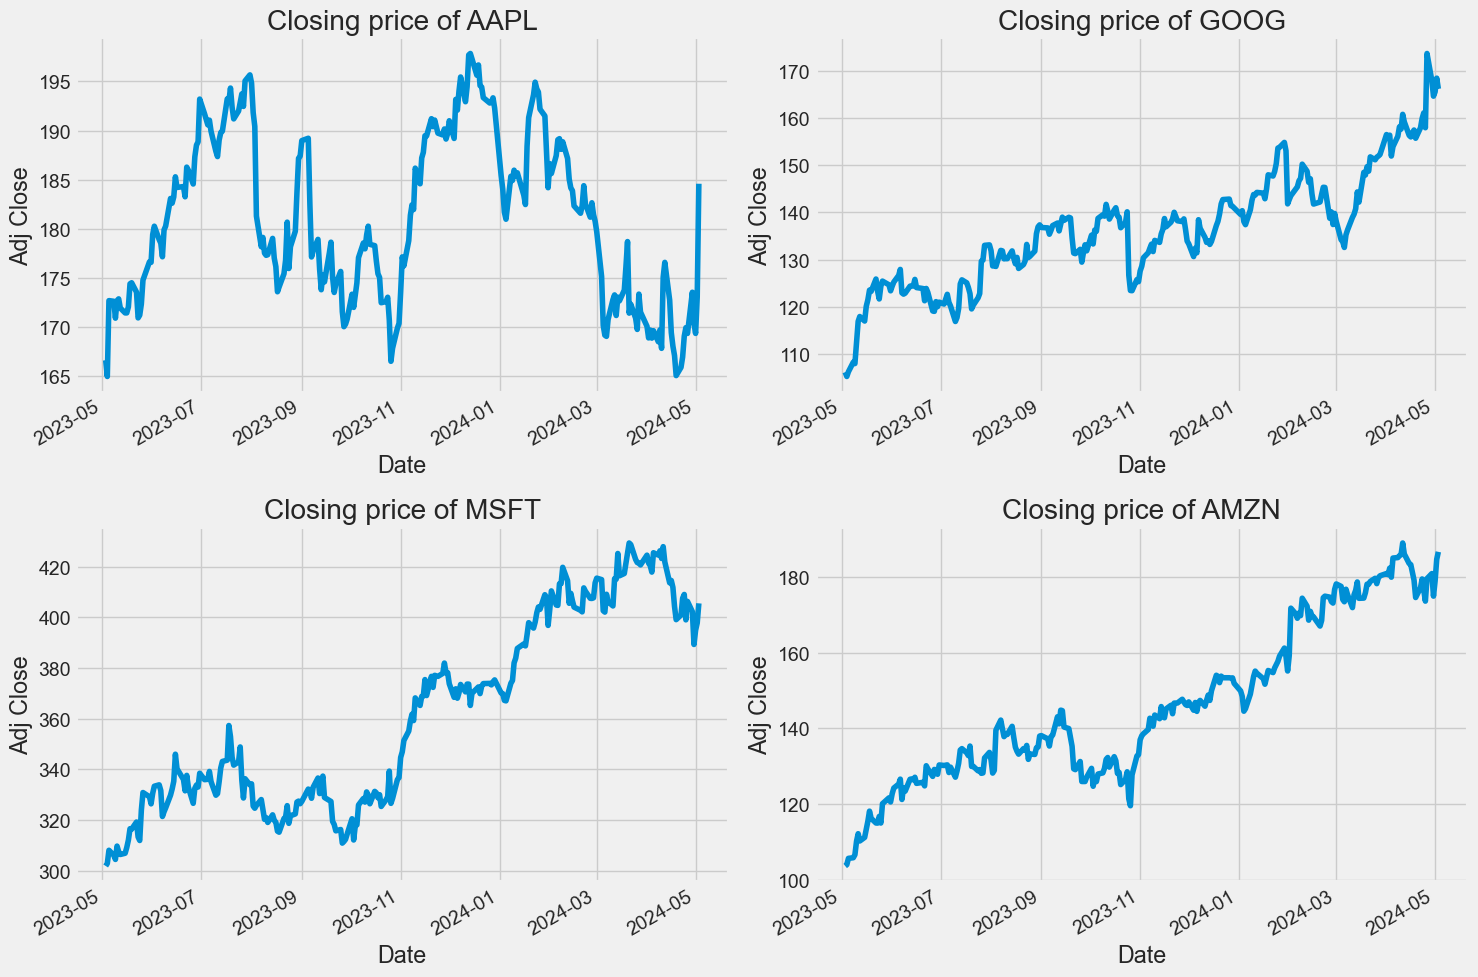

In [86]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top =1.25,bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing price of {tech_list[i - 1]}")
    
plt.tight_layout()  

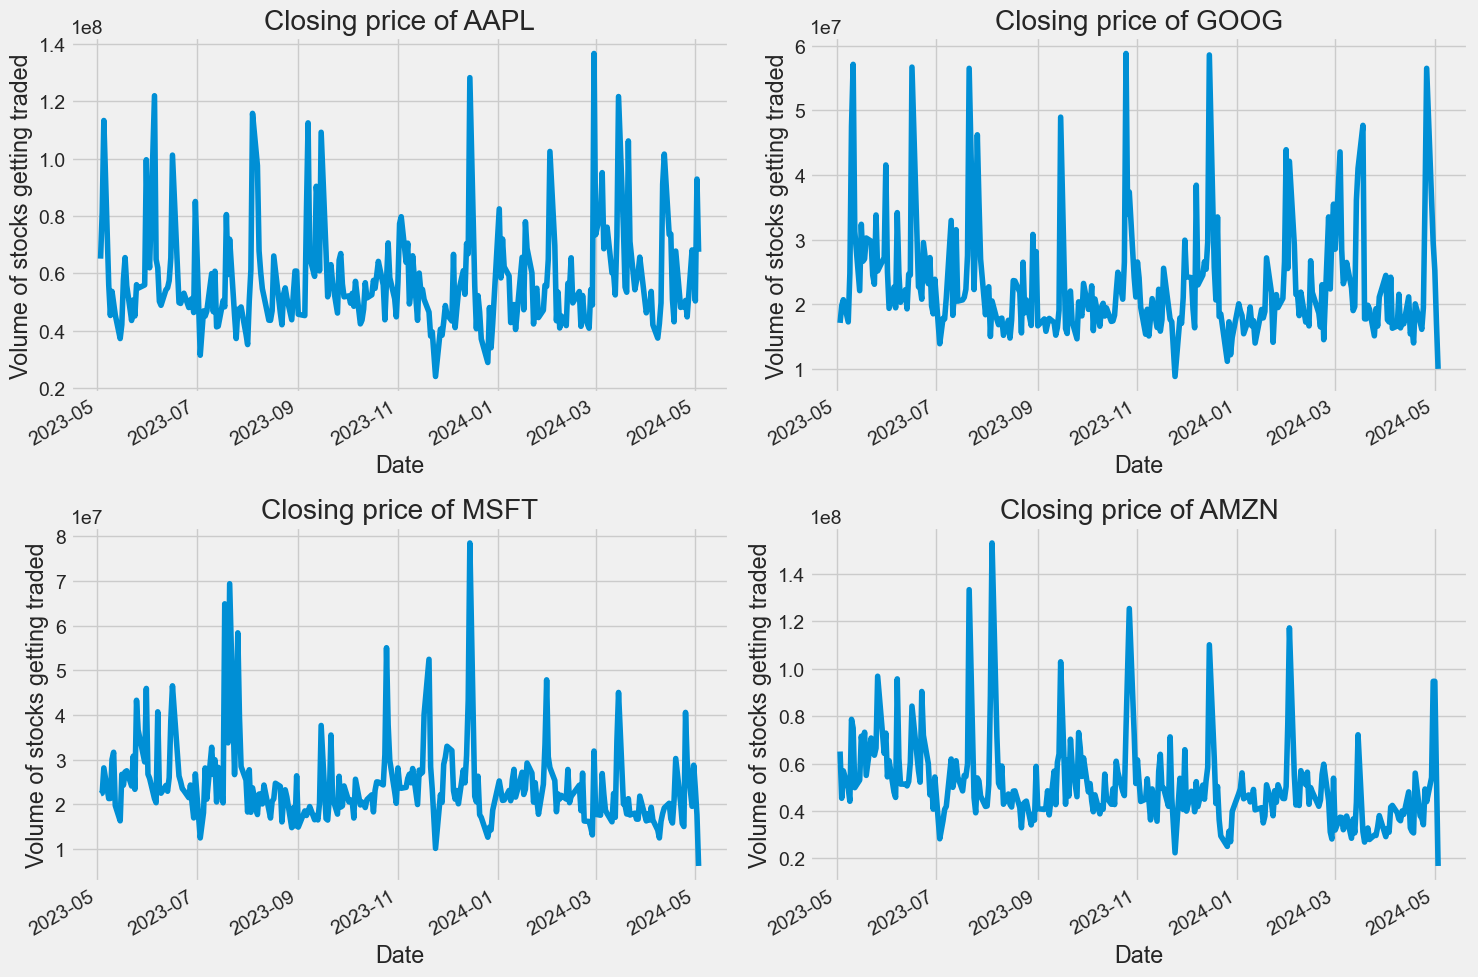

In [87]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top =1.25,bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume of stocks getting traded')
    plt.title(f"Closing price of {tech_list[i - 1]}")
    
plt.tight_layout()  

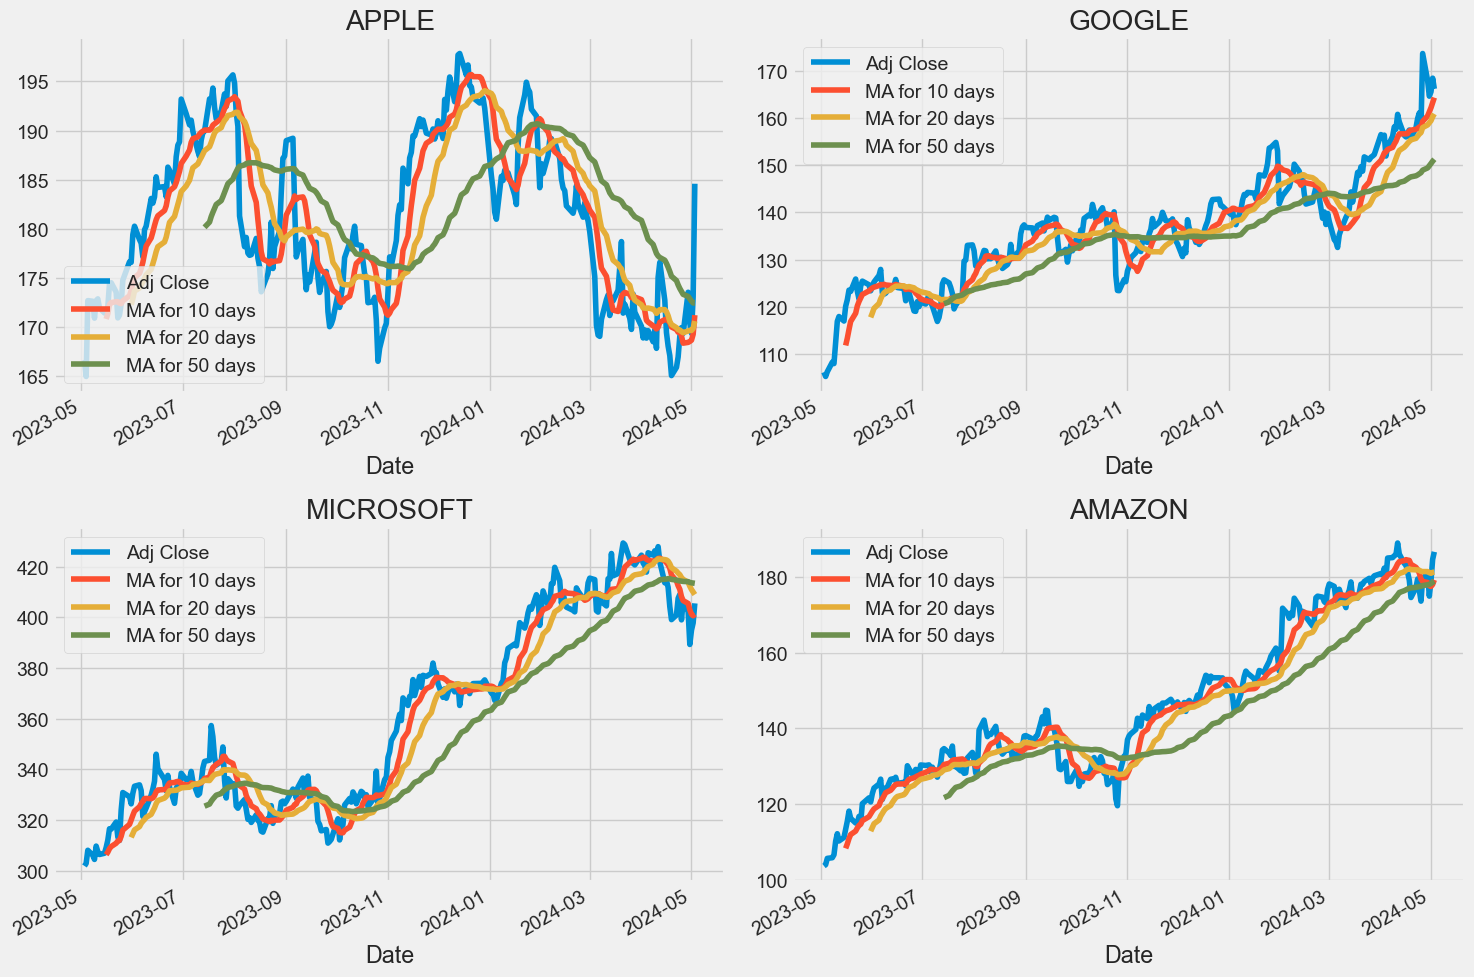

In [88]:
ma_day = [10,20,50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig,axes = plt.subplots(2,2) 
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0]).set_title('APPLE')
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

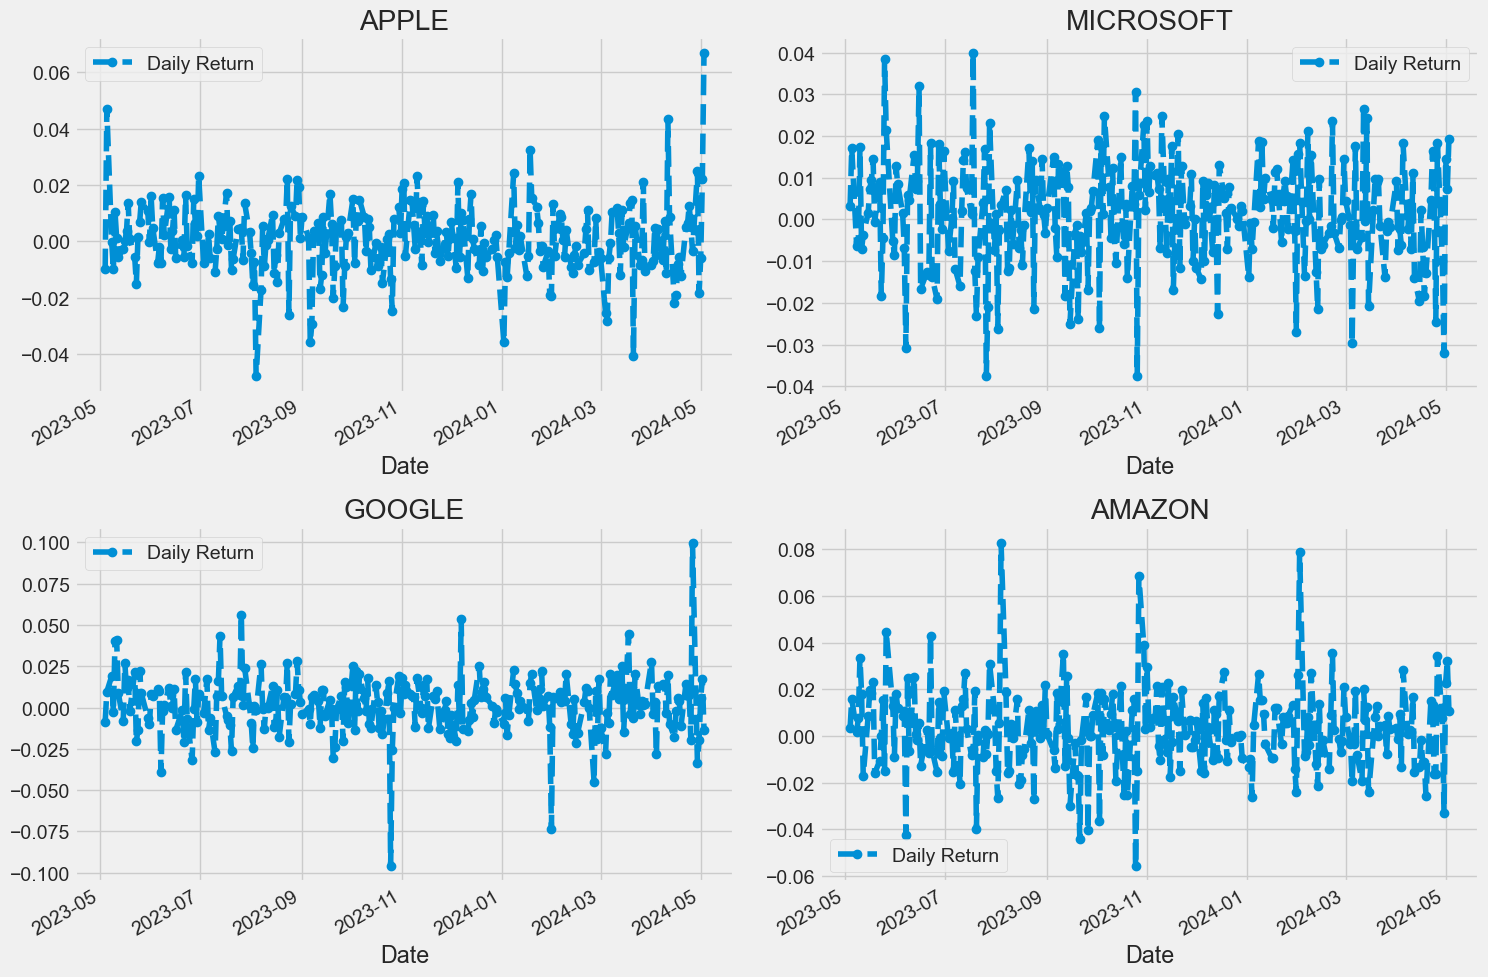

In [89]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MICROSOFT')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

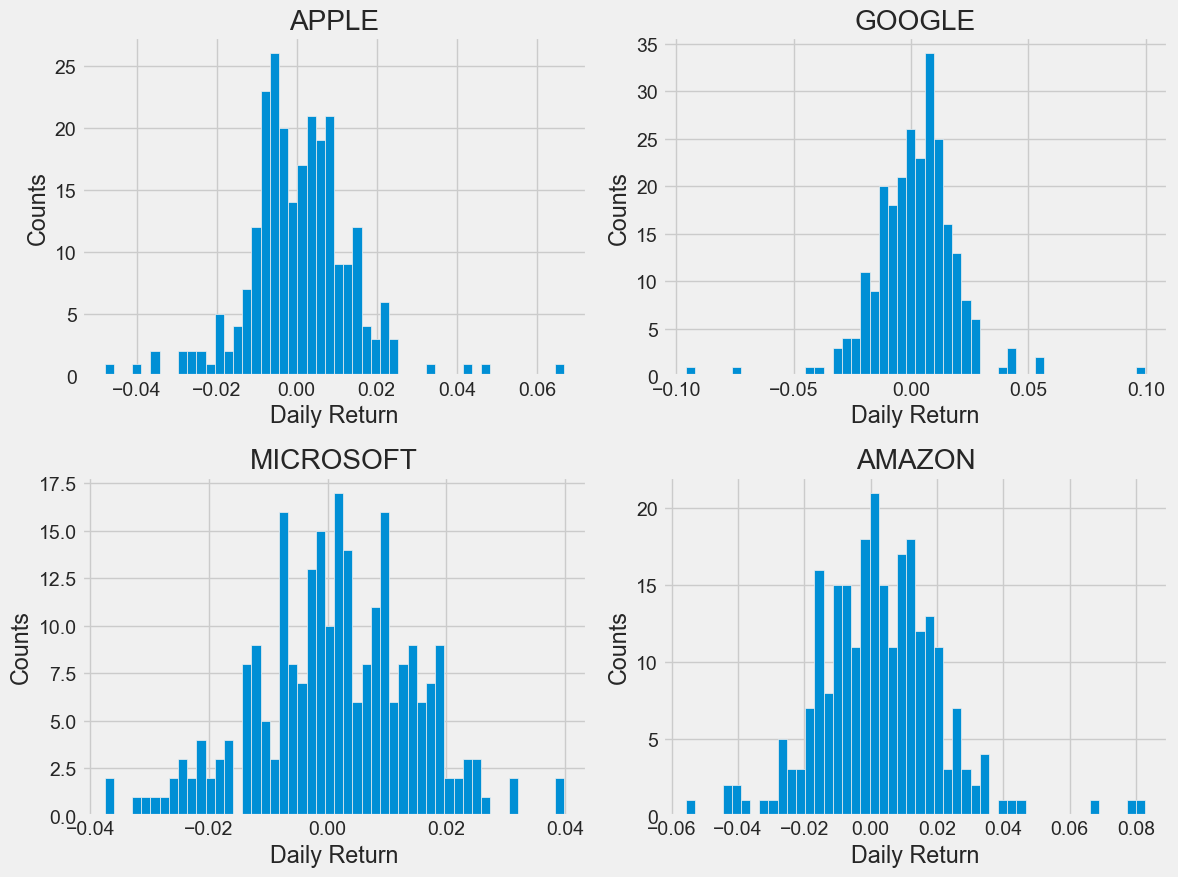

In [90]:
plt.figure(figsize=(12,9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [91]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-03,NaN,NaN,NaN,NaN
2023-05-04,-0.009913,0.003377,-0.008575,0.003318
2023-05-05,0.046927,0.015962,0.009552,0.017157
2023-05-08,-0.000403,0.001609,0.019065,-0.006438
2023-05-09,-0.009971,0.007465,-0.002772,-0.005346


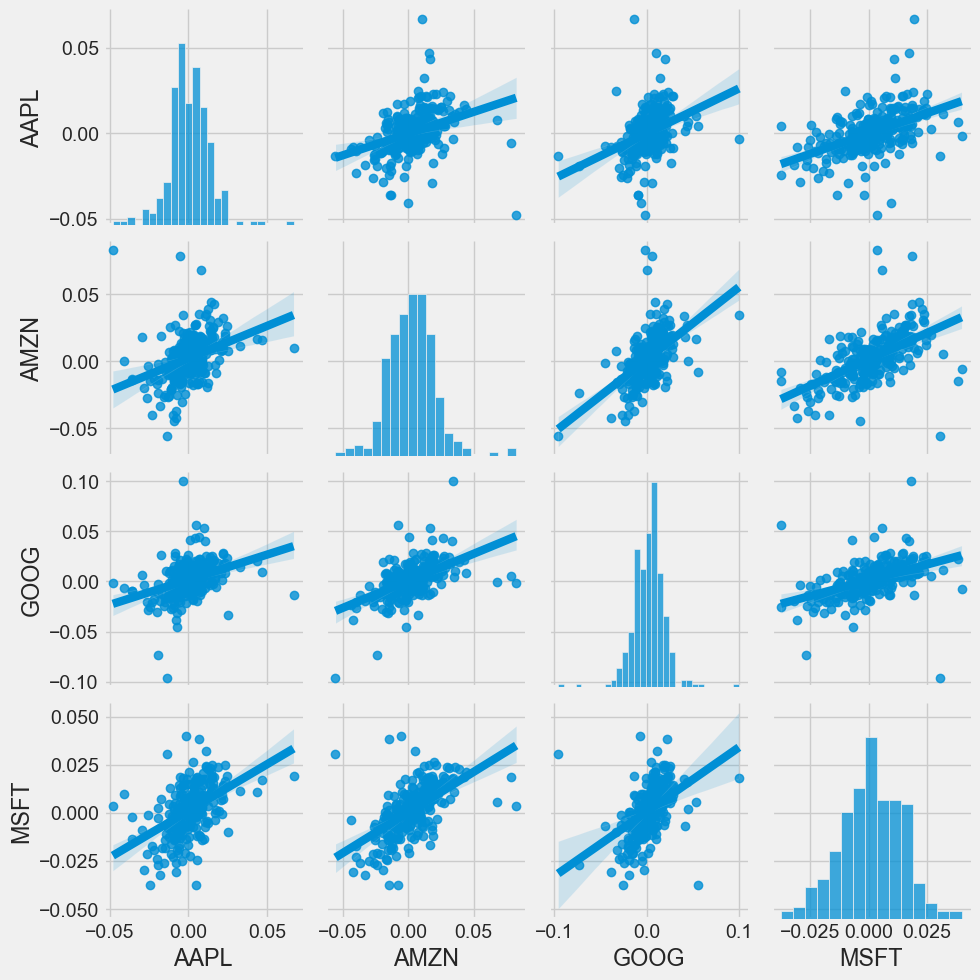

In [92]:
sns.pairplot(tech_rets, kind='reg')

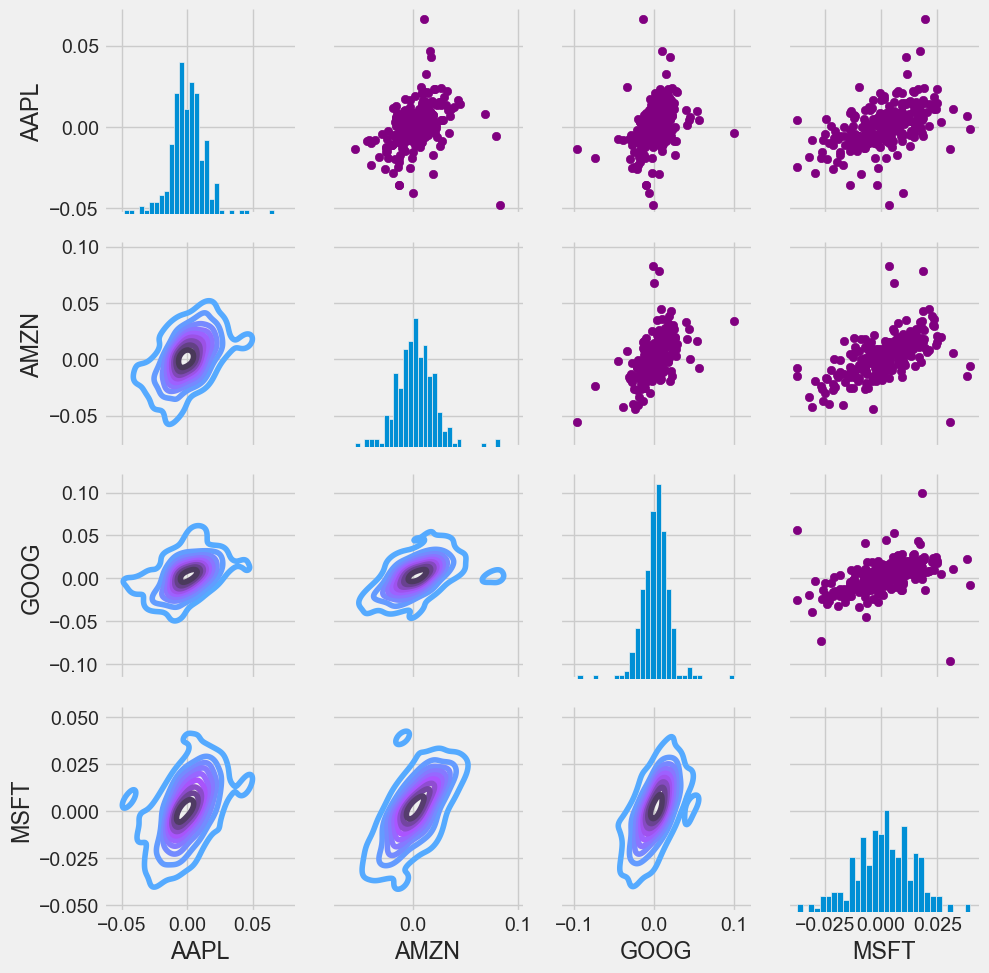

In [93]:
return_fig = sns.PairGrid(tech_rets.dropna()).map_upper(plt.scatter, color='purple').map_lower(sns.kdeplot, cmap='cool_d').map_diag(plt.hist, bins=30)


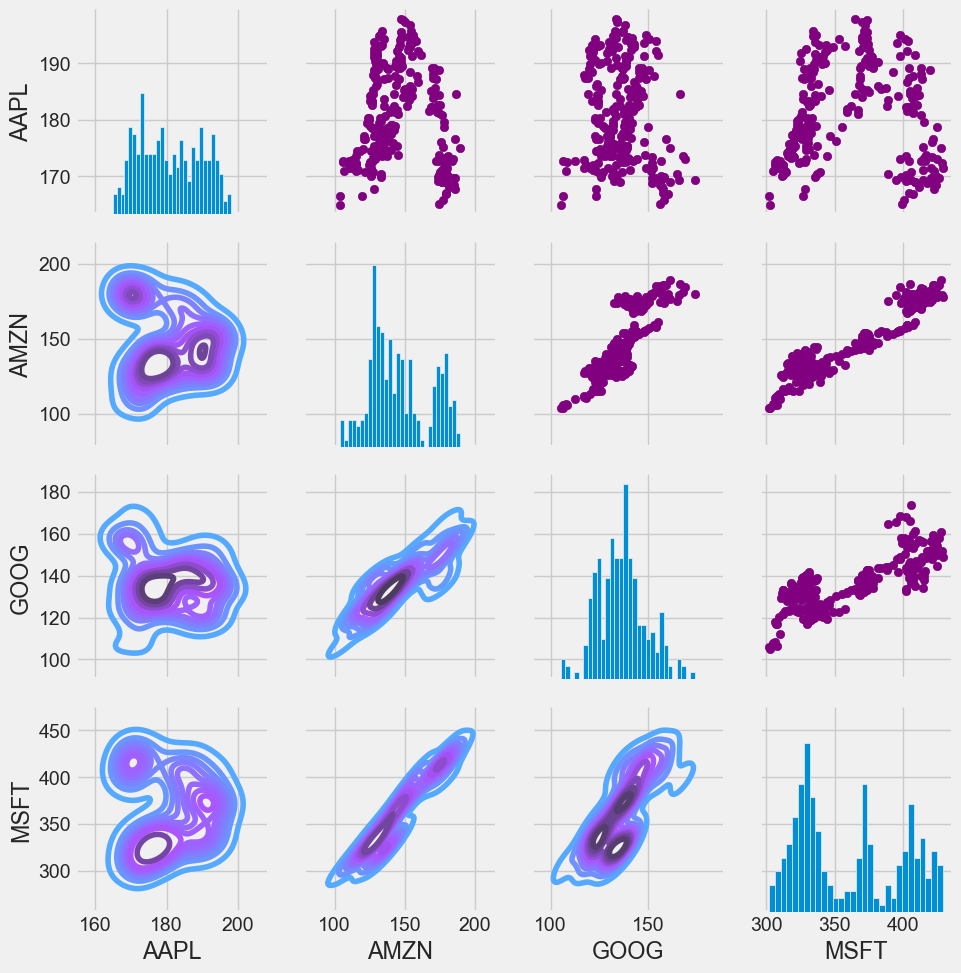

In [94]:
return_fig = sns.PairGrid(closing_df.dropna()).map_upper(plt.scatter, color='purple').map_lower(sns.kdeplot, cmap='cool_d').map_diag(plt.hist, bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

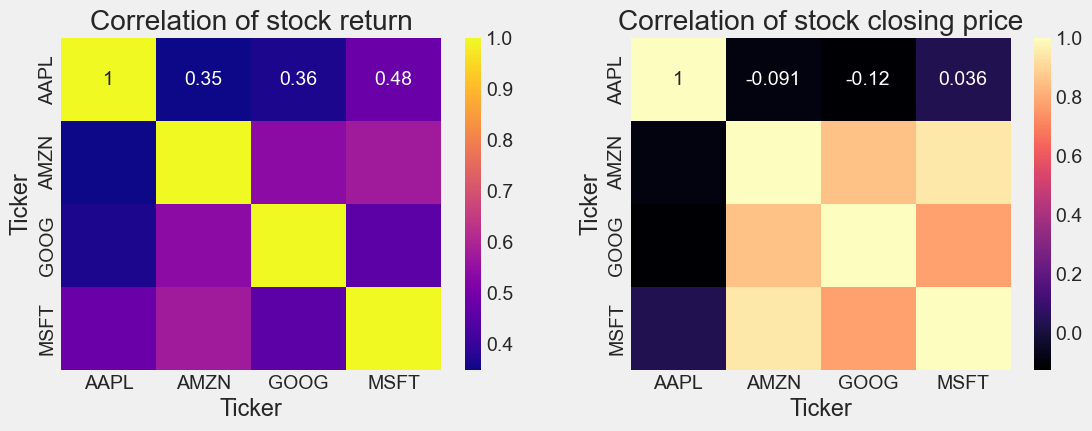

In [99]:
plt.figure(figsize = (12,9))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='plasma')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='magma')
plt.title('Correlation of stock closing price')



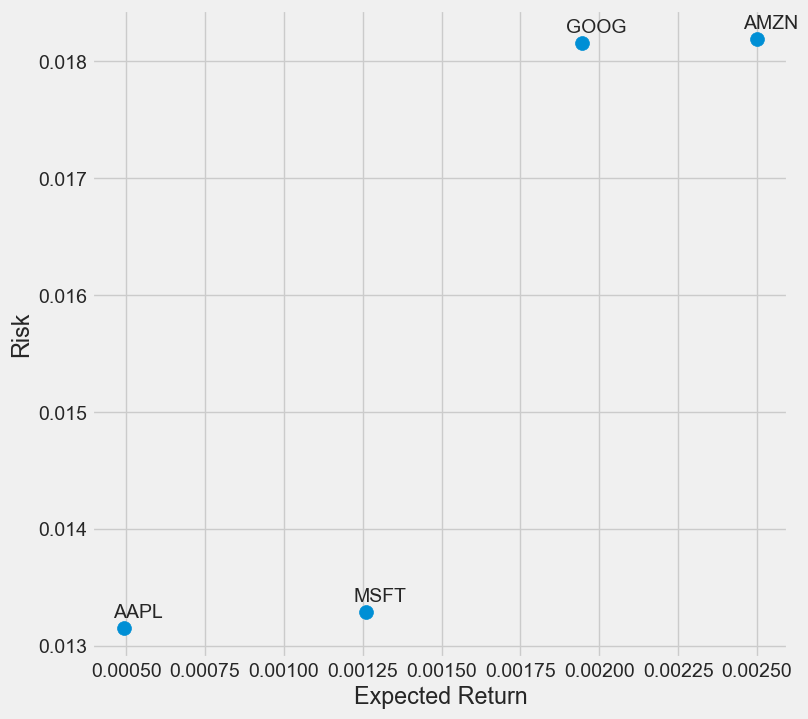

In [108]:
plt.figure(figsize=(8,8))
rets = tech_rets.dropna()
marker_size = 100
plt.scatter(rets.mean(), rets.std(), s=marker_size)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for company, mean_return, risk in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(company, xy=(mean_return, risk), xytext=(10, 5), textcoords='offset points', ha='center', va='bottom')

plt.show()


In [110]:
df = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900
2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800
2024-05-01,181.639999,185.149994,176.559998,179.000000,179.000000,94645100


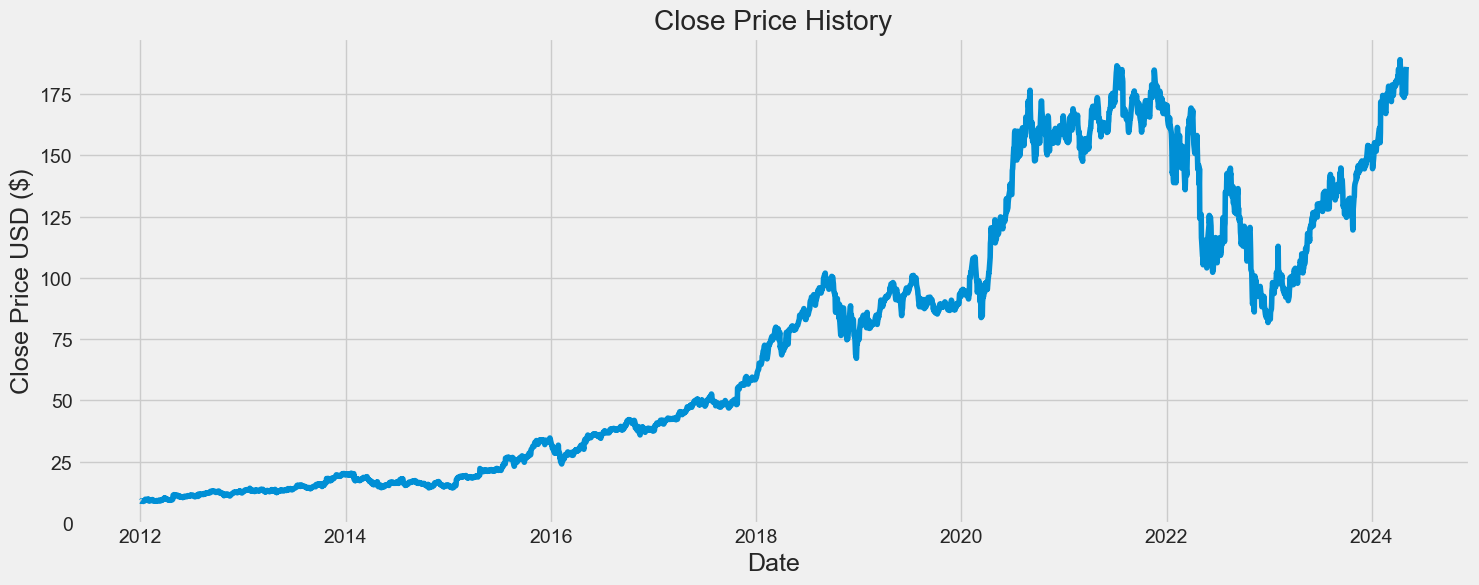

In [111]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [120]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .85 ))
training_data_len

2639

In [124]:
import torch 
import numpy

# Assuming 'dataset' is defined earlier
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]

# Define a function to create input-output pairs for training
def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    X = torch.tensor(X)
    y = torch.tensor(y)
    return X, y

lookback = 10

# Create training and testing datasets
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

# Print shapes of the training and testing data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.